<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

# 1D Finite Element Solver

Use a Fimite Elememt method to solve $-u'' + 3u = x$  on $(0,3)$ with the boundary conditions $u(0)=u(3)=0$.
* Who: Niall Madden (Niall.Madden@UniversityOfGalway.ie)
* Why: For 2224-MA378 
* When: March 2024

Note: this is a Jupyter Notebook, using the **Calysto Octave** kernel. If you haave access to 
[https://cloudjupyter.universityofgalway.ie/] you can access this directly at:


The true solution to this problem is defined in this inline function:

In [1]:
u = @(x)(-exp(sqrt(3)*x) + exp(-sqrt(3)*x))/(exp(3*sqrt(3))-exp(-3*sqrt(3))) + x/3;

Define the boundary values:

In [2]:
a=0; b=3;

We want to solve the problem for various values of $N$ in order to verify convergence. 
We'll take $N=2, 4, 8$. 

In [3]:
for N=2.^(1:3)
   h = (b-a)/N; % mesh width
   x = linspace(a,b,N+1)'; % the mesh
   
   A = zeros(N+1,N+1); % IMPORTANT - in a realistic setting, this would be sparse
   B = zeros(N+1,1); % IMPORTANT - in a realistic setting, this would be sparse
   
   A(1,1)=1;  % for the left boundary condtion
   for i=2:N
      A(i,i-1:i+1) = [-1,2,-1]/h + 3*[1,4,1]*h/6;
      B(i) = (i-1)*h^2;
   end
   A(N+1,N+1)=1;  % for the right boundary condtion
  
   uh = A\B; % solve the linear system
   
   Error = norm(u(x) - uh, inf);
   fprintf('n=%4d, Error=%10.3e\n', N, Error);
end

n=   2, Error= 9.324e-02
n=   4, Error= 2.908e-02
n=   8, Error= 6.446e-03


Plot the solution for the final value of $N$.

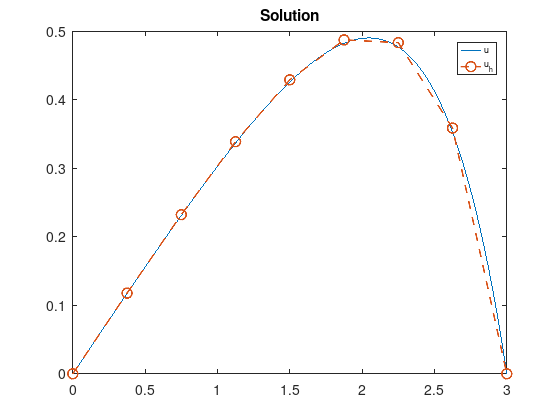

In [4]:
X = linspace(a,b,1001);
plot(X,u(X), x, uh, '--o',...
   'LineWidth', 2, 'MarkerSize', 10);
   legend('u', 'u_h'); set(gca, 'FontSize', 14);
title('Solution')

And plot the error:

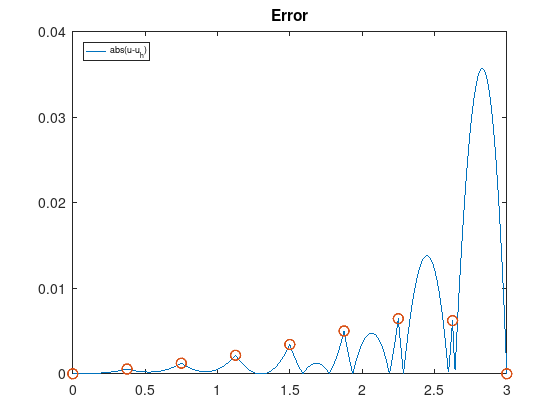

In [5]:
plot(X, abs(u(X) - interp1(x, uh,X)), '-',...
   x, abs(u(x)-uh), 'o', ...
   'LineWidth', 2, 'MarkerSize', 10);
legend('abs(u-u_h)', 'Location', 'NorthWest'); 
set(gca, 'FontSize', 14);
title('Error')